In [2]:
# Dataset Link - https://drive.google.com/file/d/1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke/view?usp=drive_link

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [4]:
# Link of the dataset
id = "1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke"
link = "https://drive.google.com/uc?export=download&id="+id
print(link)

https://drive.google.com/uc?export=download&id=1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke


In [5]:
# Downloading dataset
!wget "https://drive.google.com/uc?export=download&id=1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke" -O bike_sharing.csv

--2024-10-16 17:42:18--  https://drive.google.com/uc?export=download&id=1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke
Resolving drive.google.com (drive.google.com)... 142.250.107.113, 142.250.107.139, 142.250.107.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke&export=download [following]
--2024-10-16 17:42:19--  https://drive.usercontent.google.com/download?id=1nvwPj63FhJ5VWVm9KmDzcc-DLAFof8ke&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  -

In [6]:
# Assumption : All observations inside our data will be indepndent of each other.

In [7]:
# Viewing dataset
df = pd.read_csv("./bike_sharing.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [8]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
#shape of dataset
df.shape

(10886, 12)

In [10]:
#basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
#Checking for duplicate values
len(df.drop_duplicates())

10886

In [12]:
#Infrence : No duplicate values

In [13]:
#basic info about dataset
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
df.describe(include="O")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [15]:
#making list of columns for further use, reduces time complexity by not runnning
#df.column again and again
list_of_cols = list(df.columns)
print(list_of_cols)

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


In [16]:
# Checking count = casual + registered
np.sum(df['count']==df['casual']+df['registered'])

10886

In [17]:
len(df)

10886

In [18]:
#Infrence : Count = Casual + Registered

In [19]:
#Defining a function for returning unique value of different columns
#Just for analysis purpose
def unique(*list_of_col):
  '''
    Return - Unique Value_Counts of columns
    Parameters - *list_of_col : (type = arg), Columns for which you want to check unique values
  '''

  for i in list_of_col:
    print('-'*50,end='\n')
    print(df[i].value_counts())

unique('season', 'holiday', 'workingday', 'weather')

--------------------------------------------------
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
--------------------------------------------------
holiday
0    10575
1      311
Name: count, dtype: int64
--------------------------------------------------
workingday
1    7412
0    3474
Name: count, dtype: int64
--------------------------------------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [20]:
#Infrence :
# Data is evenly distributed around Season
# Holiday : 0 - No , 1 - Yes
# Working Day : 1 - Yes , 0 - No
# Data is not evenly spread around weather
# Only 1 datapoint has Type 4 weather
# Max datapoints have Type 1 weather

In [21]:
#Checking for null value, intution - no null value present
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [22]:
#Infrence : No null value

In [23]:
#Using list of columns
list_of_cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [24]:
#checking statistics of temp, atemp
df[['temp','atemp']].describe()

,temp,atemp
count,10886.00000,10886.000000
mean,20.23086,23.655084
std,7.79159,8.474601
min,0.82000,0.760000
25%,13.94000,16.665000
50%,20.50000,24.240000
75%,26.24000,31.060000
max,41.00000,45.455000


In [25]:
#Checking correlation between temp and atemp
np.corrcoef(df['temp'],df['atemp'])

array([[1.        , 0.98494811],
       [0.98494811, 1.        ]])

<Axes: xlabel='temp', ylabel='atemp'>

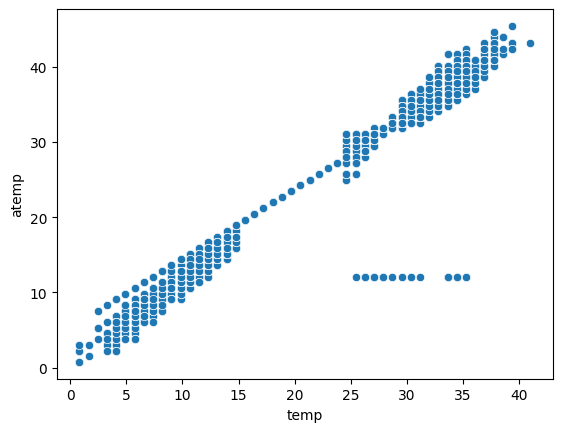

In [26]:
#Visualizing scatter plot of temp, atemp
sns.scatterplot(x = df['temp'],y = df['atemp'])

In [27]:
#Infrence :
# High Correlation between temp and atemp
# But points, 25<=temp<36 and 10<=atemp<=15 are looking weird

In [28]:
df[(df['temp']<=36) & (df['atemp']<=15) & (df['temp']>=25) & (df['atemp']>=10)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,151,157
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,368,379
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,320,378


In [29]:
#Infrence :
# atemp have same value at different hours on 17/08/2012
# maybe some error

In [30]:
#Getting sense of data by looking at it
df.iloc[0:25]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [31]:
#Getting sense of data by looking at it
df.loc[len(df)-25:len(df)-1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10861,2012-12-18 23:00:00,4,0,1,1,13.94,17.425,49,6.0032,1,80,81
10862,2012-12-19 00:00:00,4,0,1,1,12.30,15.910,61,0.0000,6,35,41
10863,2012-12-19 01:00:00,4,0,1,1,12.30,15.910,65,6.0032,1,14,15
10864,2012-12-19 02:00:00,4,0,1,1,11.48,15.150,65,6.0032,1,2,3
10865,2012-12-19 03:00:00,4,0,1,1,10.66,13.635,75,8.9981,0,5,5
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678


In [32]:
#Infrence :
# Data is on hourly bases

In [33]:
#Coverting date time to pandas datetime object
df['datetime_modified'] = pd.to_datetime(arg = df['datetime'],format = '%Y-%m-%d %H:%M:%S')

In [34]:
df['datetime_modified'].head()

,datetime_modified
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


In [35]:
#Dropping datetime column
df.drop(['datetime'],axis=1,inplace=True)

In [36]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_modified
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [37]:
#Assigning date to a different col
df['date'] = df['datetime_modified'].dt.date

In [38]:
#Observing data for each date
df.groupby(by=['date']).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_modified
date,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667,2011-01-01 11:30:00.000000000
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087,2011-01-02 11:46:57.391304448
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,5.454545,55.863636,61.318182,2011-01-03 12:19:05.454545408
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,4.695652,63.217391,67.913043,2011-01-04 11:52:10.434782720
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,3.565217,66.000000,69.565217,2011-01-05 11:52:10.434782720
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,31.958333,178.333333,210.291667,2012-12-15 11:30:00.000000000
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,22.416667,135.333333,157.750000,2012-12-16 11:30:00.000000000
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,8.833333,182.208333,191.041667,2012-12-17 11:30:00.000000000


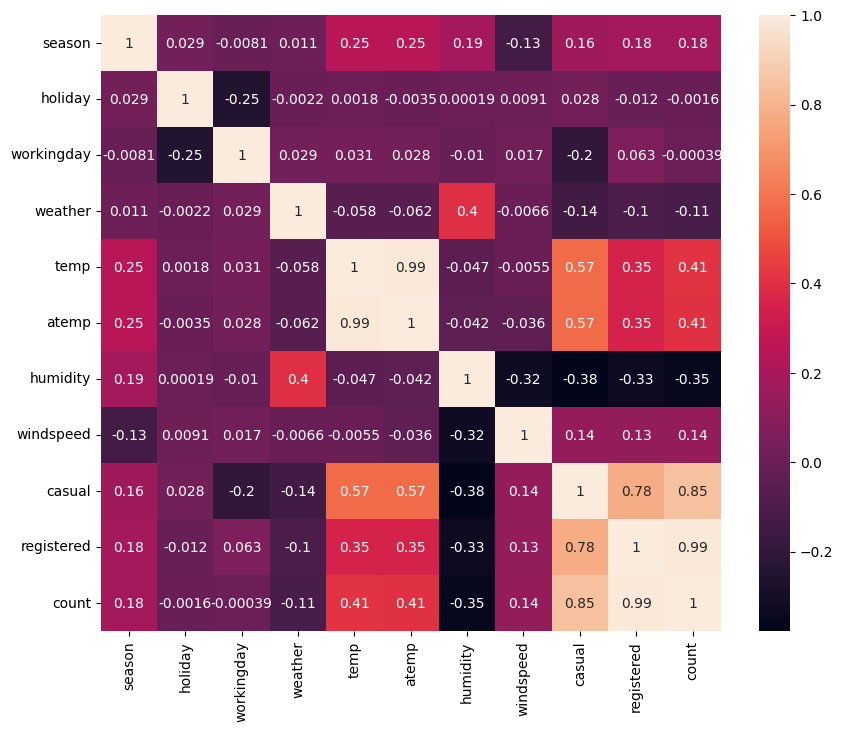

In [39]:
#Correlations between features
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['datetime_modified','date'],axis=1).corr(method='spearman'),annot=True)
plt.show()

In [40]:
#Infrence :
# because count = casual + registered (it is obvious that correlation between them is high)
# atemp and temp have a high positive correlation which is obvious as i see before
# weather and humidity also have a positive relation
# season have some positive correlation with casual, registered, count
# atemp have good positive correlation with casual, registered, count
# temp also have good positive correlation with casual, registered, count
# working day have some negative correlation with casual
# humidity also have negative correlation with casual, registered, count
# weather also have some negative correlation with casual, registered, count
# windspeed have positive correlation with casual, registered, count
# holiday does not have much correaltion with casual, registered, count
# temp, atemp, humidity have some positive correlation with season
# working day and holiday have some negative correlation which is obvious
# windspeed and humidity have some negative correlation between them

#Bam!!!!!

# <font color='Blue'>Feature Engineering :</font>

# Feature Binning

### For, temp and atemp
- Bining temp in 5 categories 'Extreme Cold', 'Cold', 'Normal', 'Summer', 'Extreme Summer'
- According to temperature in degree celcius

### Humidity
- Dry and comfortable: Less than or equal to 55
- Becoming "sticky" with muggy evenings: Between 55 and 65
- Lots of moisture in the air, becoming oppressive: Greater than or equal to 65

### Windspeed
- Calm: Winds of 0–1 km/h (0–1 mph). Smoke rises vertically.
- Light air: Winds of 1–5 km/h (1–3 mph). Smoke drifts slowly.
- Light breeze: Winds of 6–11 km/h (4–7 mph). Wind is felt on the face, and leaves rustle.
- Gentle breeze: Winds of 12–19 km/h (8–12 mph). Leaves and small twigs move constantly, and light flags extend.
- Moderate breeze: Winds of 20–29 km/h (13–18 mph). Dust and small branches move, and flags flap.
- Fresh breeze: Winds of 30–39 km/h (19–24 mph). Small leafy trees begin to sway, flags ripple, and crested wavelets form on inland waters.
- Strong breeze: Winds of 40–49 km/h (25–31 mph). Large branches move, flags beat, wires whistle, and umbrellas are difficult to control.


In [41]:
list_of_cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [42]:
#Defining a function for getting max and min value of a variable
#Bins will be created by taking max and min value into consideration
for col in list_of_cols[1:]:
  print('-'*50)
  print("Min value of "+col+" "+str(df[col].min()))
  print("Min value of "+col+" "+str(df[col].max()))
  print('-'*50)

--------------------------------------------------
Min value of season 1
Min value of season 4
--------------------------------------------------
--------------------------------------------------
Min value of holiday 0
Min value of holiday 1
--------------------------------------------------
--------------------------------------------------
Min value of workingday 0
Min value of workingday 1
--------------------------------------------------
--------------------------------------------------
Min value of weather 1
Min value of weather 4
--------------------------------------------------
--------------------------------------------------
Min value of temp 0.82
Min value of temp 41.0
--------------------------------------------------
--------------------------------------------------
Min value of atemp 0.76
Min value of atemp 45.455
--------------------------------------------------
--------------------------------------------------
Min value of humidity 0
Min value of humidity 100
---

In [43]:
#Binning features

In [44]:
#Creating new features from continuous freatures
#By converting them into multiple bins/category
df['temp_cat']=pd.cut(df['temp'],bins=[-0.001,8,16,24,32,41],labels=[-2,-1,0,1,2])
df['atemp_cat']=pd.cut(df['atemp'],bins=[-0.001,8,16,24,32,46],labels=[-2,-1,0,1,2])
df['humidity_cat']=pd.cut(df['humidity'],bins=[-0.001,55,65,100],labels=[1,2,3])
df['windspeed_cat']=pd.cut(df['windspeed'],bins=[-0.001,1,5,11,19,29,39,57],labels=[1,2,3,4,5,6,7])

#Converting each feature from dtype - category to int
df['temp_cat']=df['temp_cat'].astype('int8')
df['atemp_cat']=df['atemp_cat'].astype('int8')
df['humidity_cat']=df['humidity_cat'].astype('int8')
df['windspeed_cat']=df['windspeed_cat'].astype('int8')

In [45]:
#Creating new features from datetime_modified column
#Creating new feature year
df['year']=df['datetime_modified'].dt.year
#Creating new feature month
df['month']=df['datetime_modified'].dt.month
#Creating new feature weekday
df['weekday']=df['datetime_modified'].dt.weekday
#Creating new feature quarter
df['quarter']=df['datetime_modified'].dt.quarter

In [46]:
#Viewing all columns present in dataset
pd.set_option("display.max.columns", df.shape[1])
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_modified,date,temp_cat,atemp_cat,humidity_cat,windspeed_cat,year,month,weekday,quarter
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01,-1,-1,3,1,2011,1,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01,-1,-1,3,1,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01,-1,-1,3,1,2011,1,5,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01,-1,-1,3,1,2011,1,5,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01,-1,-1,3,1,2011,1,5,1


In [47]:
#Getting sense of data
df[['year','quarter', 'month','weekday']].describe()

,year,quarter,month,weekday
count,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,2.506614,6.521495,3.013963
std,0.500019,1.116174,3.444373,2.004585
min,2011.000000,1.000000,1.000000,0.000000
25%,2011.000000,2.000000,4.000000,1.000000
50%,2012.000000,3.000000,7.000000,3.000000
75%,2012.000000,4.000000,10.000000,5.000000
max,2012.000000,4.000000,12.000000,6.000000


In [48]:
df.loc[df['weekday']==0][['date','month','weekday']]
#0 - Monday , 6 - Sunday

,date,month,weekday
47,2011-01-03,1,0
48,2011-01-03,1,0
49,2011-01-03,1,0
50,2011-01-03,1,0
51,2011-01-03,1,0
...,...,...,...
10833,2012-12-17,12,0
10834,2012-12-17,12,0
10835,2012-12-17,12,0
10836,2012-12-17,12,0


In [49]:
#Creating a dictonary containing variable name and their mapping with thier respective category
#I will use this dictionary in further analysis specifically in EDA
map_labels_to_cat = {'temp_cat':{-2:'Extreme Cold',-1:'Cold',0:'Normal',1:'Summer',2:'Extreme Summer'},
                            'atemp_cat':{-2:'Extreme Cold',-1:'Cold',0:'Normal',1:'Summer',2:'Extreme Summer'},
                            'humidity_cat':{1:'Comfortable',2:'Sticky and Muggy',3:'Oppresivev'},
                            'windspeed_cat':{1:'Calm',2:'Light Air',3:'Light breeze',4:'Gentle breeze',5:'Moderate breeze',6:'Fresh breeze',7:'Strong breeze'},

                     'year':{2011:2011,2012:2012},
                    'quarter':{1:'First Quarter',2:'Second Quarter',3:'Third Quarter',4:'Fourth Quarter'},
                    'month':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},
                    'weekday':{0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},

                    'season':{1:1,2:2,3:3,4:4},
                    'holiday':{0:'No',1:'Yes'},
                    'workingday':{0:'No',1:'Yes'},
                    'weather':{1:1,2:2,3:3,4:4}}

#Creating a list containing categorical features
list_of_cat_features = ['season', 'holiday', 'workingday', 'weather', 'temp_cat', 'atemp_cat', 'humidity_cat', 'windspeed_cat','year', 'month', 'weekday', 'quarter']

#Creating a list containing continuous features
list_of_cont_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

<Axes: >

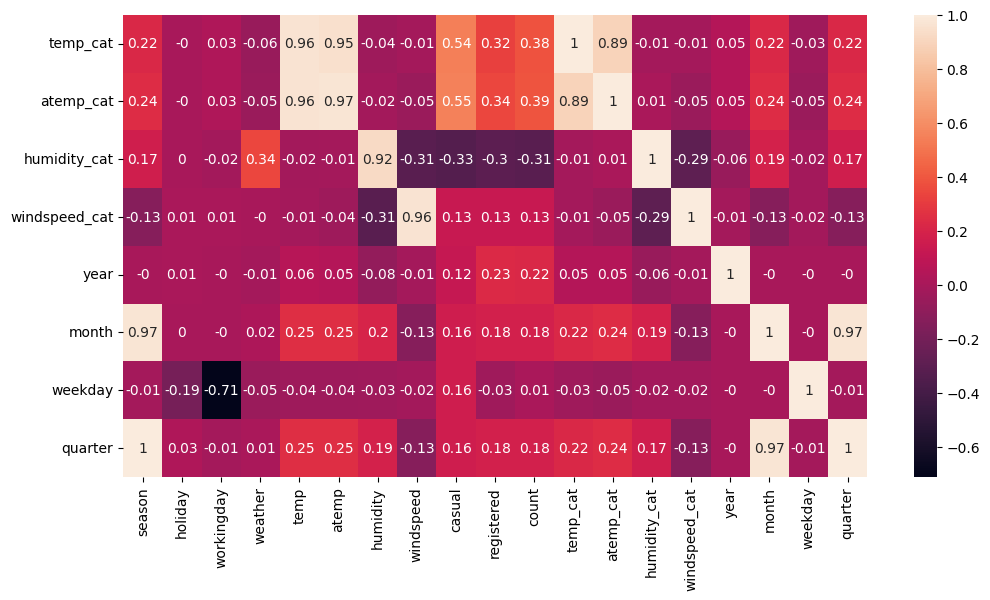

In [50]:
#Correlation with new features engineered
plt.figure(figsize=(12,6))
sns.heatmap(df.drop(['datetime_modified','date'],axis=1).corr(method='spearman')[['temp_cat', 'atemp_cat', 'humidity_cat', 'windspeed_cat','year', 'month', 'weekday', 'quarter']].round(2).transpose(),annot=True)

In [51]:
#Infrence :
# Month,quarter and Season have strong positive correlation
# Weather and humidity also have correlation but weather and month don't have correlation
# Weekday and Working day have strong negative correlation
# Correlation of temp cat,humidity with casual is good
# registered and year also have some correlation

In [52]:
#Checking whether season and quarter is same for our data
np.sum(df['season']==df['quarter'])==len(df)

True

In [53]:
#Infrence :
# Spring: March, April, May
# Summer: June, July, August
# Autumn: September, October, November
# Winter: December, January, February

# I can't categorize season as mentioned above because, if season is spring then
# it can fall in quarter 1 and quarter 2 as well but in our data
# quarter is equal to season for every value that means season is quarter for our data

# Wind speed and humidity have a relationship where higher wind speeds are associated
# with lower humidity values, and lower wind speeds are associated with higher humidity values.

#This relation we can see in out data

In [54]:
#Let's do some basic Visualization (Rule No. 1 - Always look @ data, Rule No. 2 - Don't forget Rule No. 1)

#<font color='blue'> Exploratory Data Analysis : </font>

## Visualizations

In [55]:
#Univariate

In [56]:
#Defining a funtion for making barplot for different columns
def barplot_for_diff_cols(list_of_cols,df):
  '''
    This function takes list and dataframe, plot barchart for them.

    Return - Bar Plot of different columns
    Parameters -  list_of_cols : list of columns for which you want to plot bar chart,
                  df : DataFrame
  '''

  #Checking whether column is present in DataFrame or not
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue

    df_new = pd.DataFrame(df[col].value_counts())
    df_new.reset_index(inplace = True)
    df_new[col]=df_new[col].apply(lambda x: map_labels_to_cat[col][x])
    df_new.set_index([col],inplace=True)

    #Plotting Bar Chart
    plt.figure(figsize=(df[col].nunique()+3,5))
    plt.title("Bar Plot of "+col,loc='center')
    sns.barplot(df_new,x = col,y='count',hue = col,palette = 'Paired', legend = False)
    plt.show()

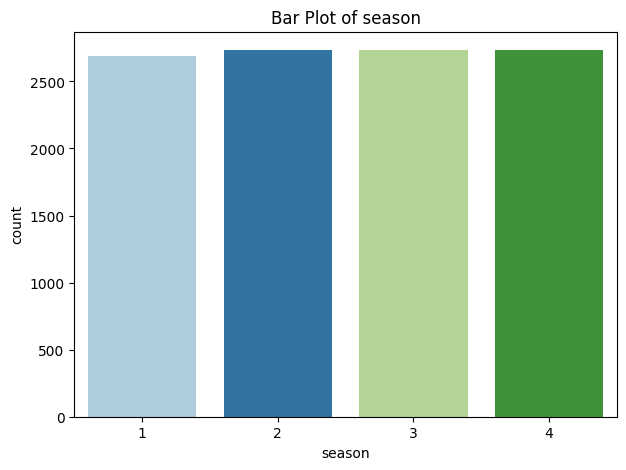

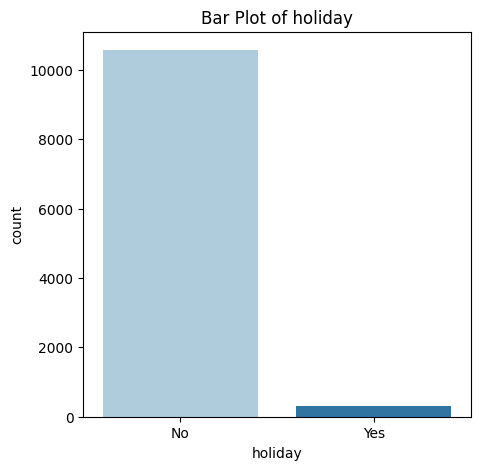

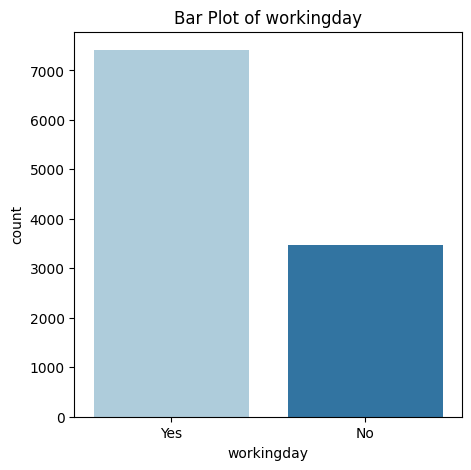

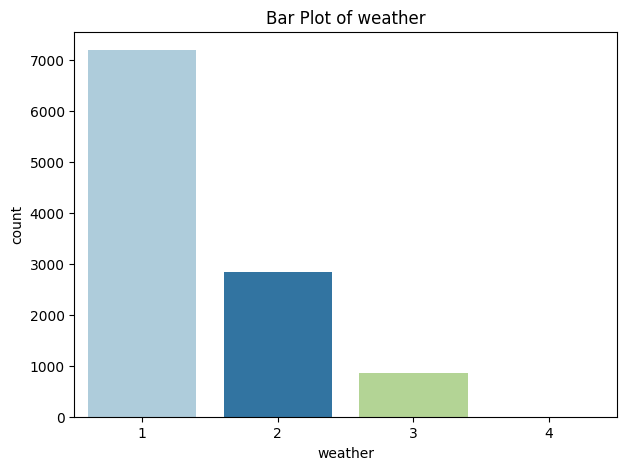

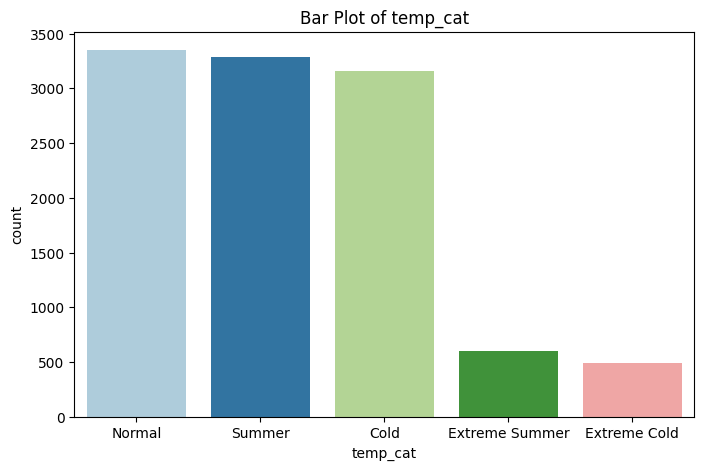

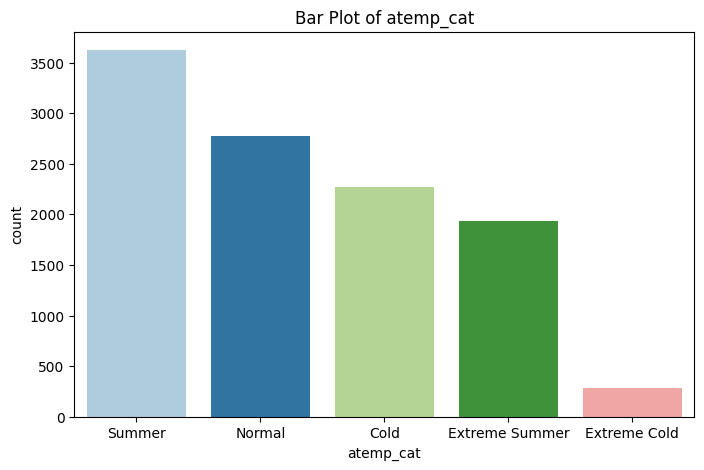

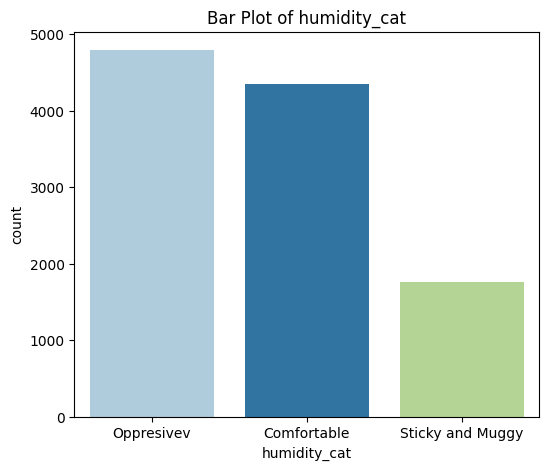

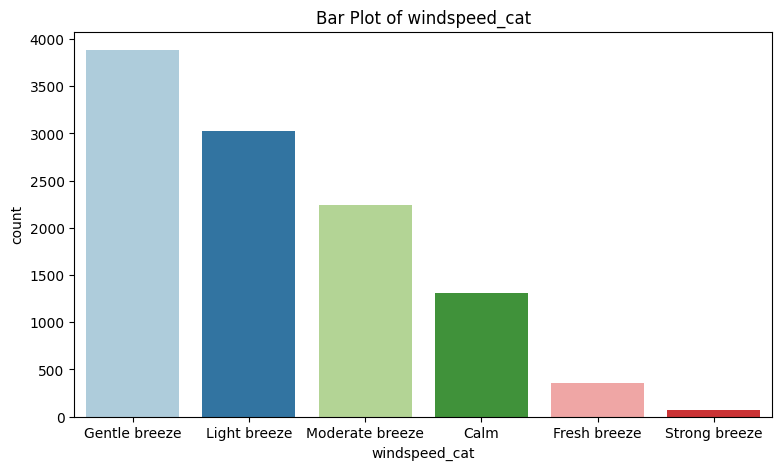

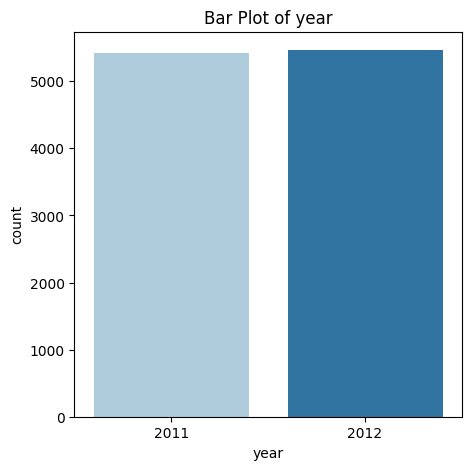

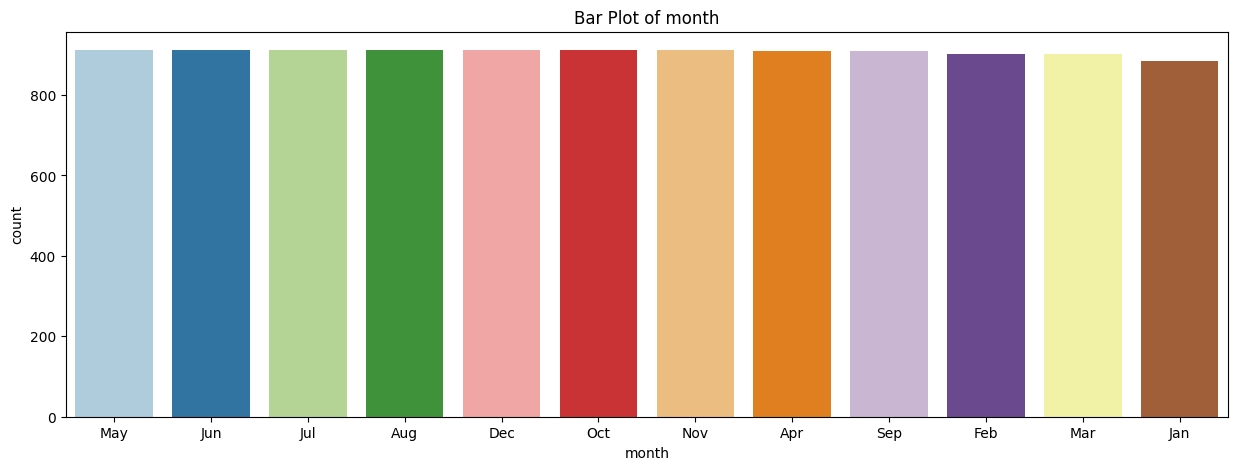

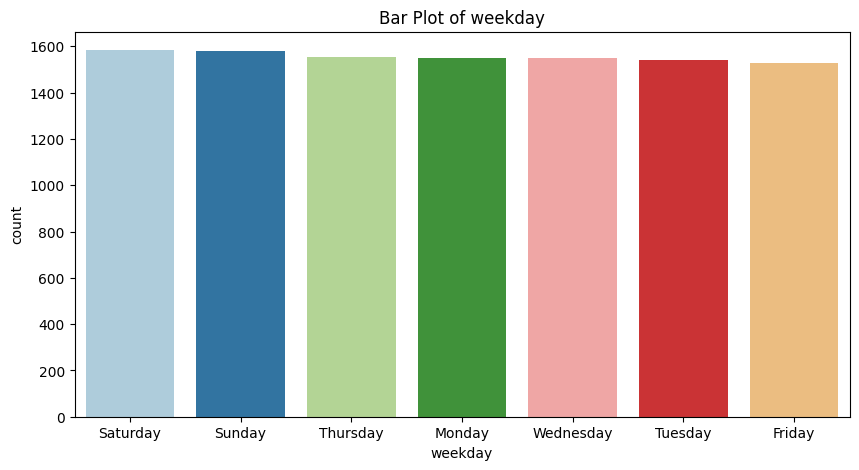

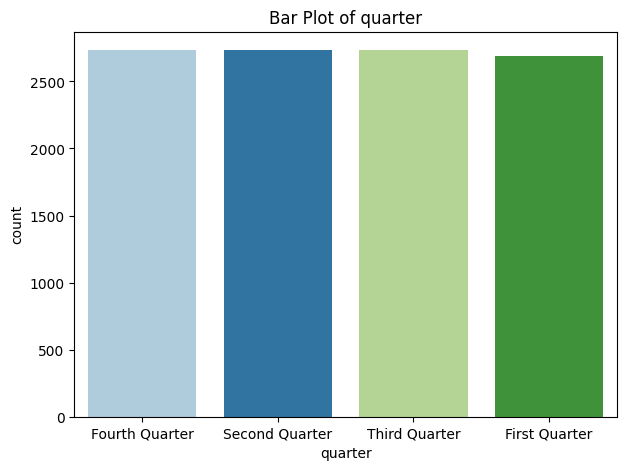

In [57]:
barplot_for_diff_cols(list_of_cat_features,df)

In [58]:
#Infrence :
# Season is evenly distributed
# Number of Holidays are much smaller than Number of no holidays
# Number of Working days are much larger than number of not working days
# Most observations have weather = 1
# Number of observation having weather = 4 is negligible
# Number of observations spread across time is more or less same
# Similarly we can see for other columns as well

In [59]:
#Checking whether holiday means not working day
df[df['holiday']==1]['workingday'].sum()==0

True

In [60]:
#Checking whether not working day is holiday
df[df['workingday']==0]['holiday'].sum()==0

False

In [61]:
#Checking whether not holiday means working day
df[df['holiday']==0]['workingday'].sum()==0

False

In [62]:
#Checking whether working day means not holiday
df[df['workingday']==1]['holiday'].sum()==0

True

In [63]:
# Number of days when no working day but not holiday
df[df['workingday']==0]['holiday'].sum()

311

In [64]:
# Number of days when no holiday but working day
df[df['holiday']==0]['workingday'].sum()

7412

In [65]:
#Infrence :
# Holiday means no working day - True
# Not working day means holiday - False
# Not holiday means working day - False
# Working day means no holiday - True
# 311 days when no working day but not holiday
# 7412 days when no holiday but working

In [66]:
#Defining a funtion for making histogram for different columns
def histogram_for_diff_cols(list_of_cols,df):
  '''
    This function takes list and dataframe, plot histogram for them.

    Return - Histogram for Columns
    Parameters -  list_of_cols : list of columns for which you want to plot Histogram
                  df : DataFrame
  '''

  #Checking whether column is present in DataFrame or not
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue

    #Plotting Histogram
    plt.figure()
    plt.title("Histogram of "+col,loc='center')
    sns.histplot(df,x = col, stat = 'frequency', bins = 'auto', alpha = 0.4, color = 'g', kde = True)
    plt.show()

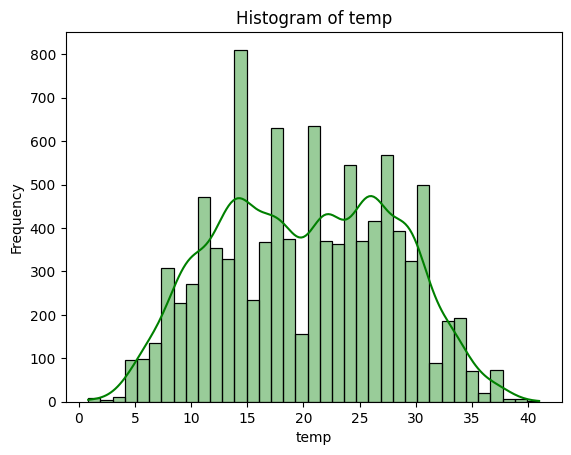

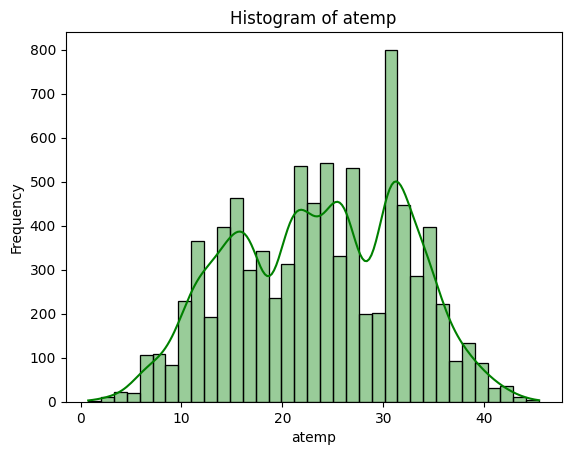

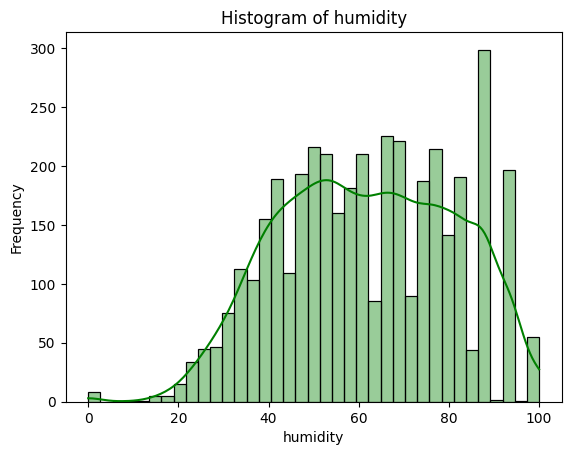

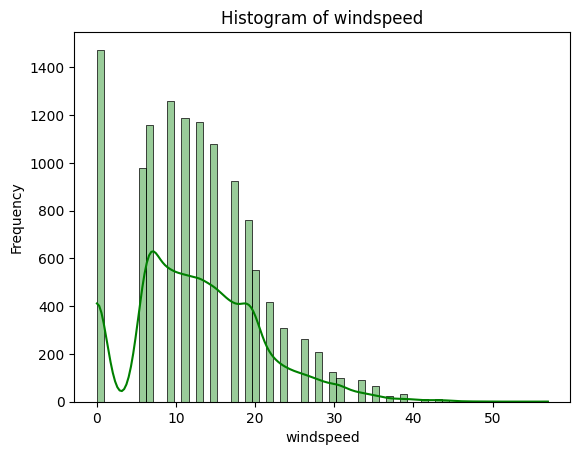

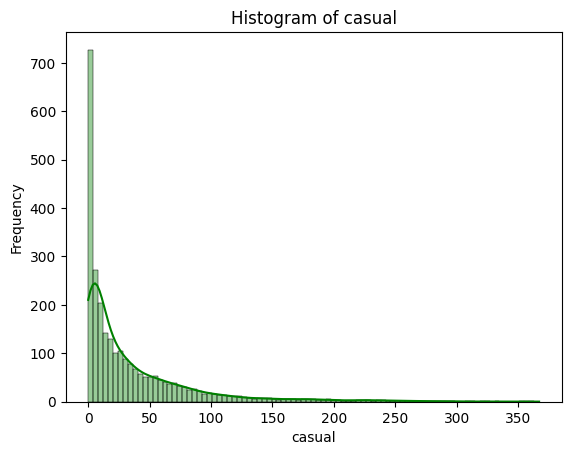

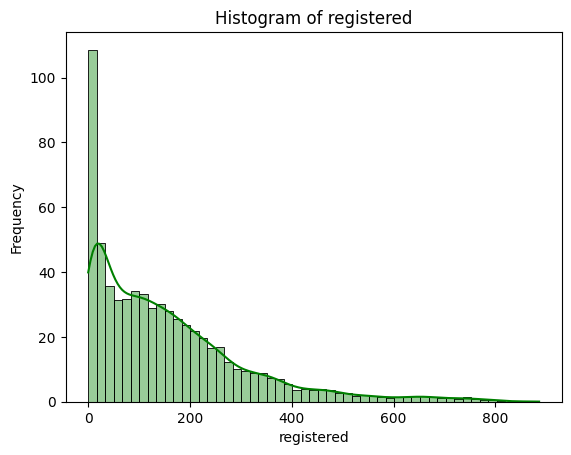

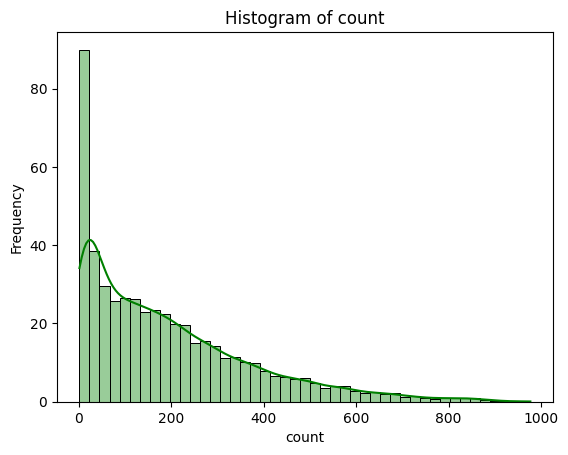

In [67]:
histogram_for_diff_cols(list_of_cont_features,df)

In [68]:
#Infrence :
# Histogram of windspeed looks weird b/w 0 and 10 seems no values.
# Skewed - Windspeed, Casual, Registered, Count

<Axes: xlabel='windspeed', ylabel='Frequency'>

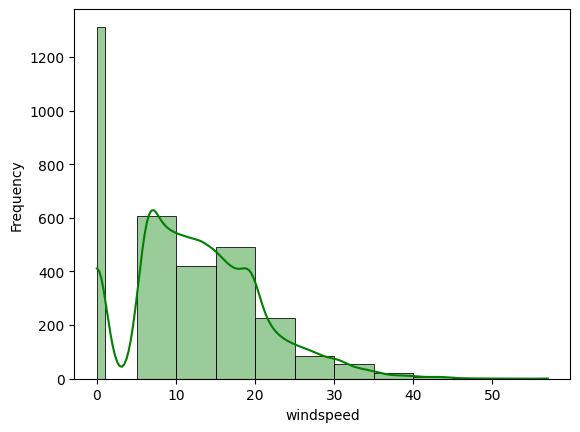

In [69]:
# plotting windspeed with different no. of bins
sns.histplot(df['windspeed'].round(2),stat='frequency',kde='True',color='g',alpha=0.4,bins=[-0.0001,1,5,10,15,20,25,30,35,40,45,50])

In [70]:
df[(df['windspeed']>=1) & (df['windspeed']<=5)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_modified,date,temp_cat,atemp_cat,humidity_cat,windspeed_cat,year,month,weekday,quarter


In [71]:
#Infrence : No value in range 1<=windspeed<=5

In [72]:
#Defining a funtion for making boxplot for different columns
def boxplot_for_diff_cols(list_of_cols,df):
  '''
    This function takes arguments and dataframe, plot boxplot for them.

    Return - Boxplot for Columns
    Parameters -  list_of_cols : list of columns for which you want to plot Boxplot
                  df : DataFrame
  '''

  #Checking whether column is present in DataFrame or not
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue

    #Plotting Boxplot
    plt.figure()
    plt.title("Boxplot of "+col,loc='center')
    plt.boxplot(df[col])
    plt.show()

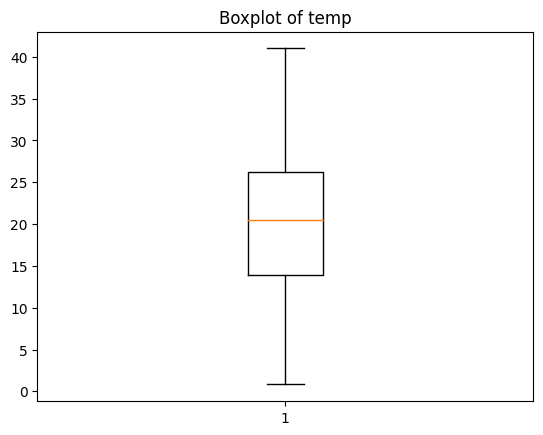

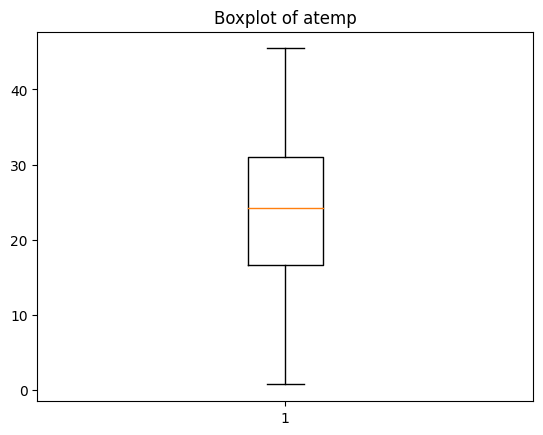

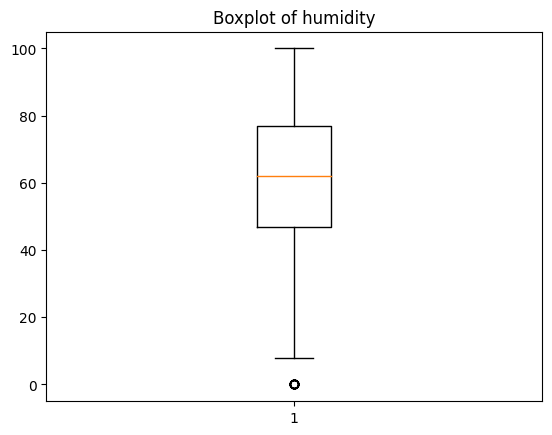

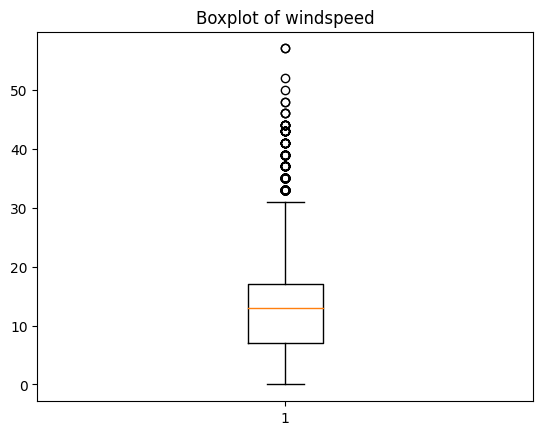

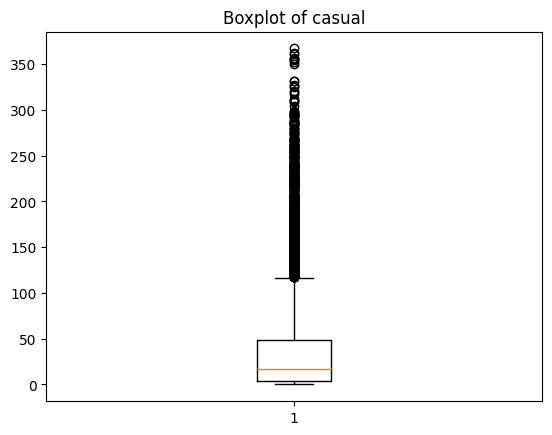

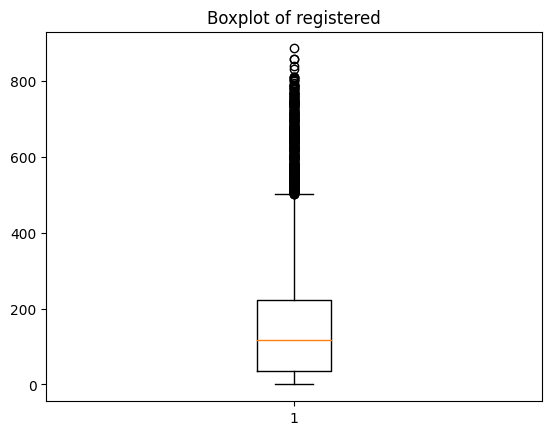

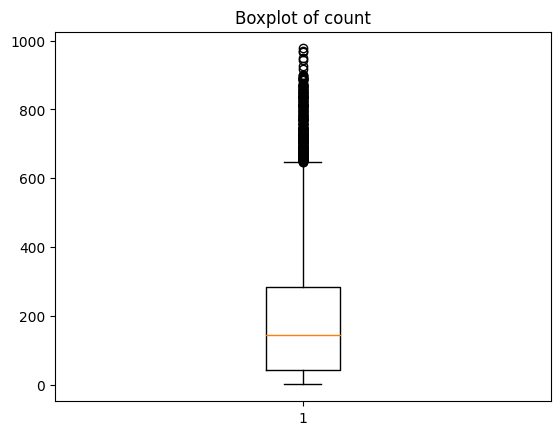

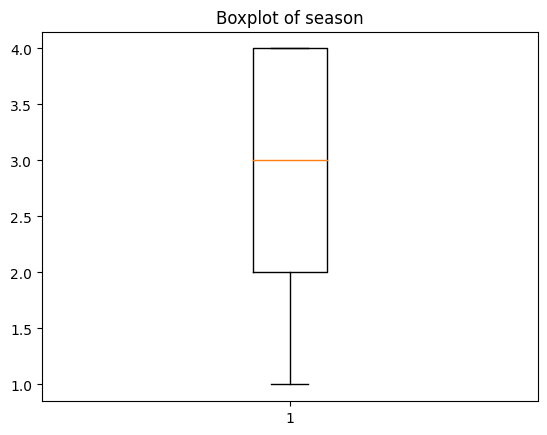

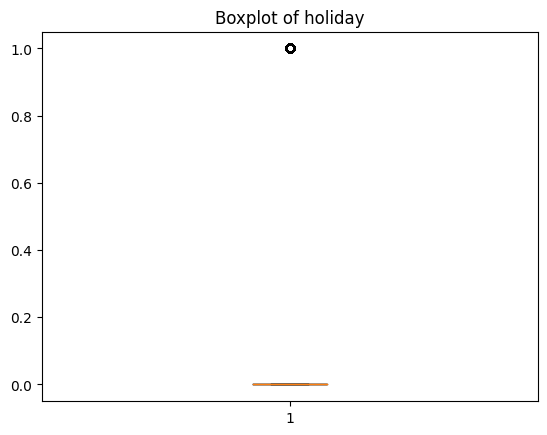

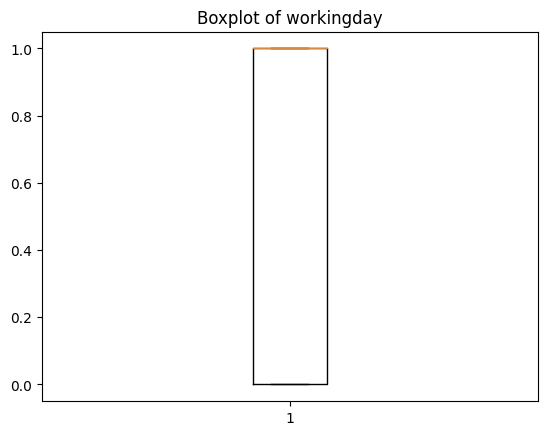

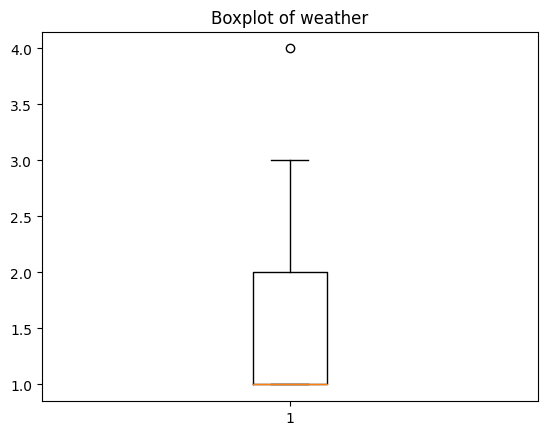

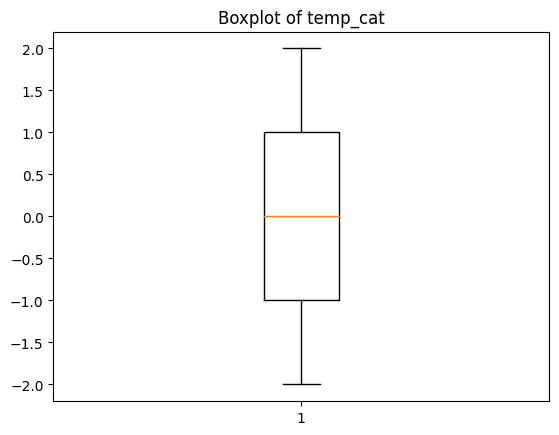

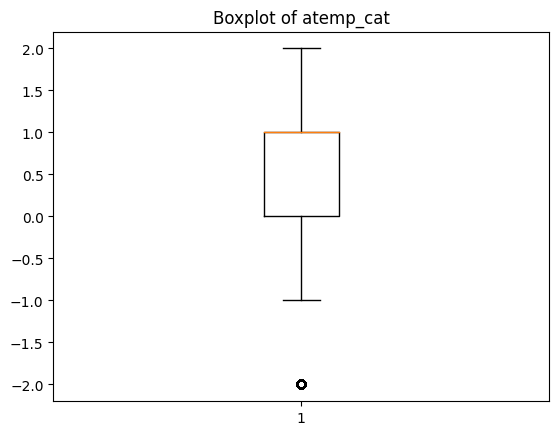

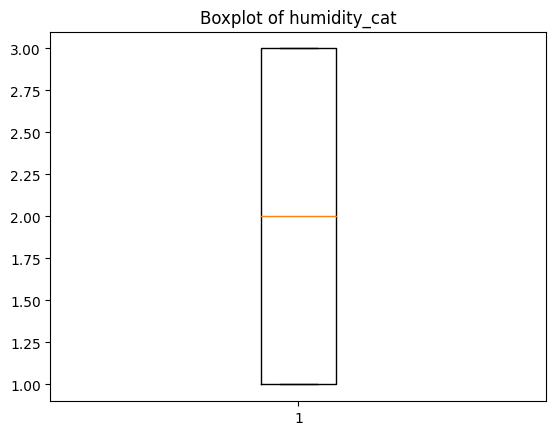

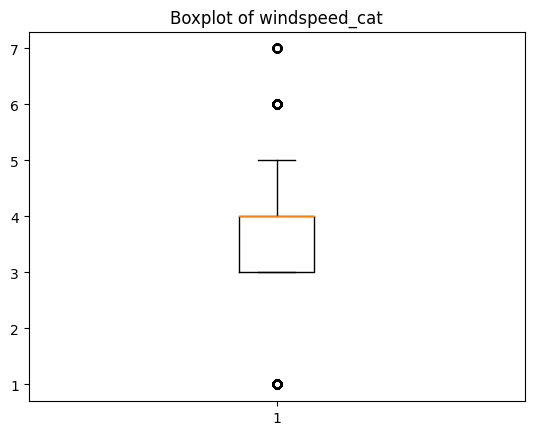

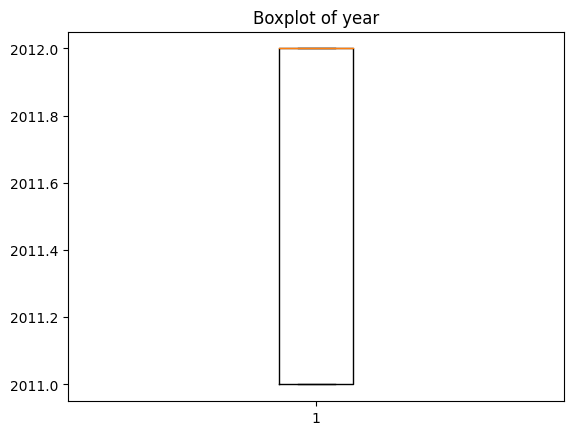

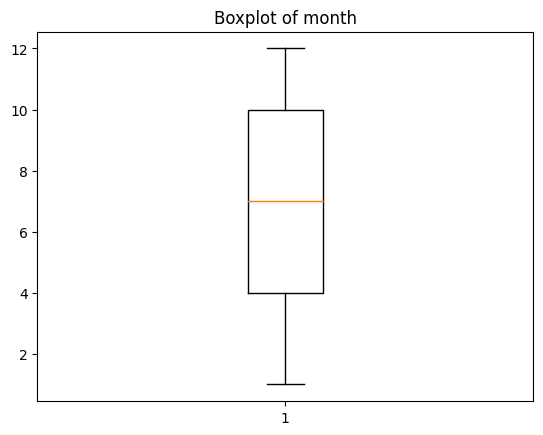

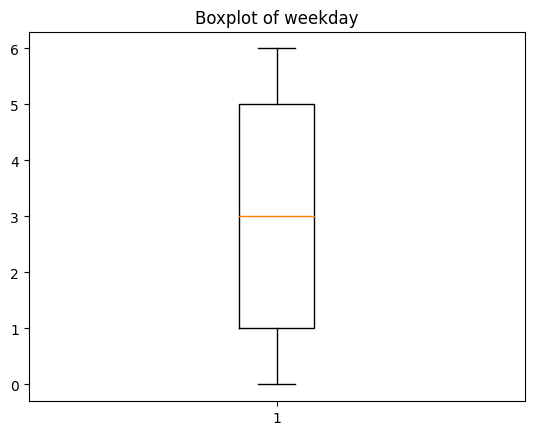

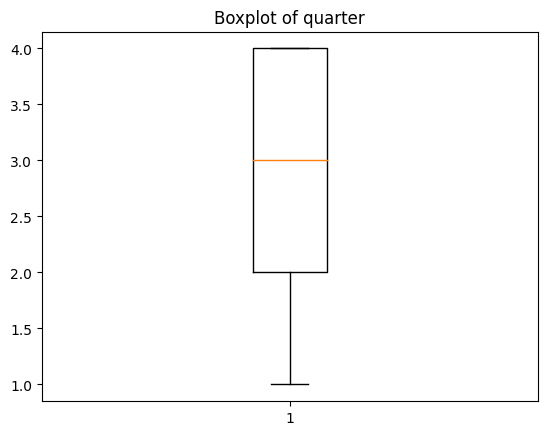

In [73]:
boxplot_for_diff_cols(list_of_cont_features+list_of_cat_features,df)

In [74]:
#Infrence :
# Number of observations having holiday = 1 < Number of observations having holiday = 0
# Number of observations having workingday = 1 > Number of observations having workingday = 0
# Weather = 4, may be outlier
# temp, atemp have no outliers
# and much more

In [75]:
#Multivariate Visualization

In [76]:
list_of_cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [77]:
#Defining a funtion for making barplot for different columns with other columns
def barplot_multivariate(list_of_cols,df):
  '''
    This function takes arguments and dataframe, plot barplot for them.

    Return - Barplot for Columns with other columns
    Parameters -  list_of_col : List of columns for which you want to plot Barplot with other columns
                  df : DataFrame
  '''
  #Checking whether columns is present in DataFrame or not
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue

    #Transforming the dataframe so that i can get good visualization
    df_new=df.drop(['date','datetime_modified'],axis=1).groupby(col).sum()[['casual','registered','count']]
    df_new2 = df_new.stack().reset_index()
    df_new2.rename(columns={0: 'sum','level_1':'Type'},inplace=True)

    #Plotting the transformed dataframe
    plt.figure()
    plt.title("Barplot of "+col+" with Casual, Registered, Count",loc='center')
    sns.barplot(x=df_new2[col].apply(lambda x: map_labels_to_cat[col][x]),y=df_new2['sum'],hue=df_new2['Type'])
    plt.show()

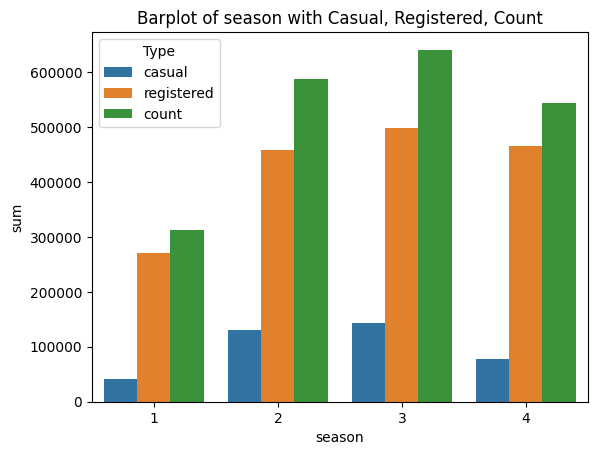

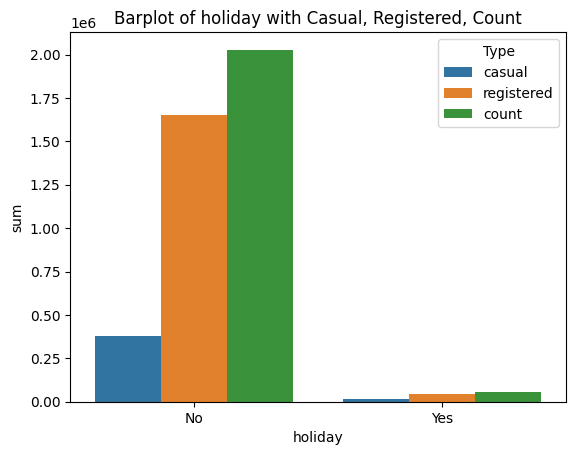

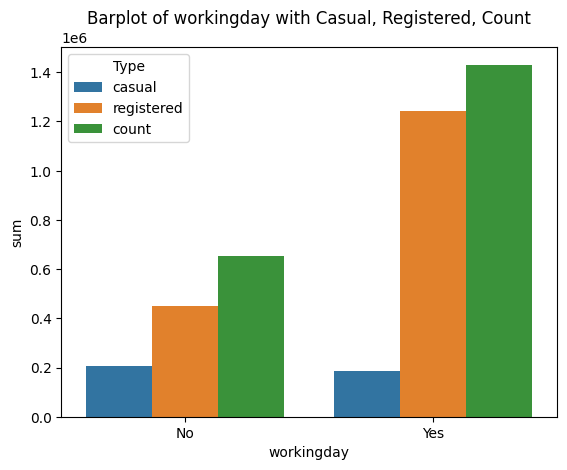

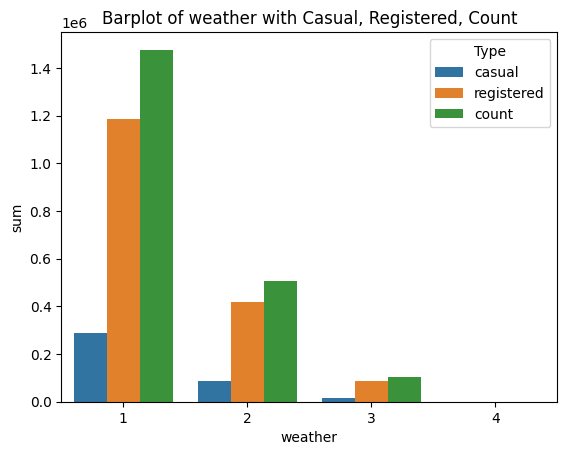

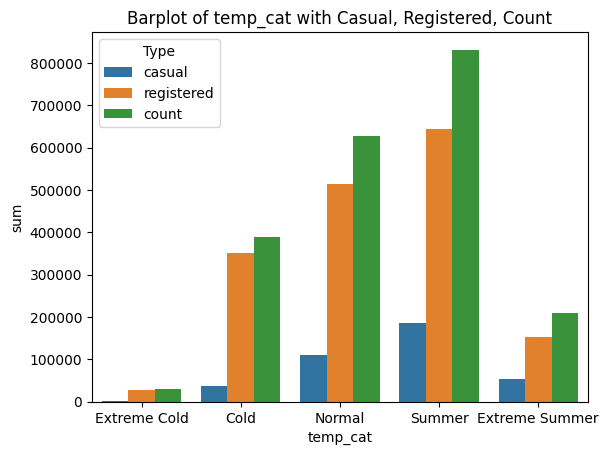

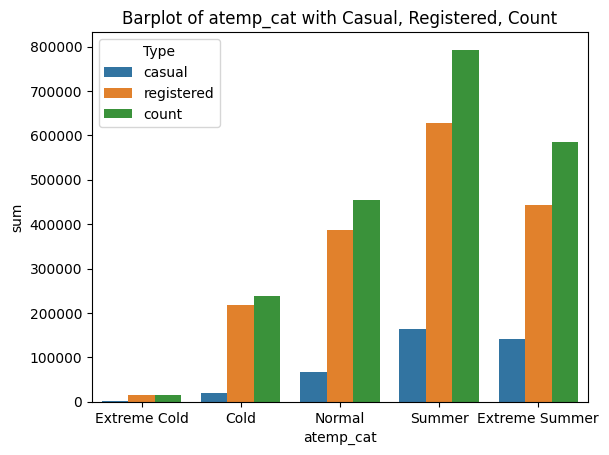

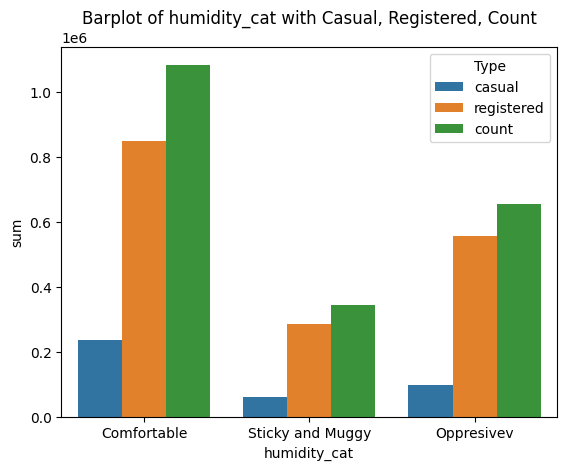

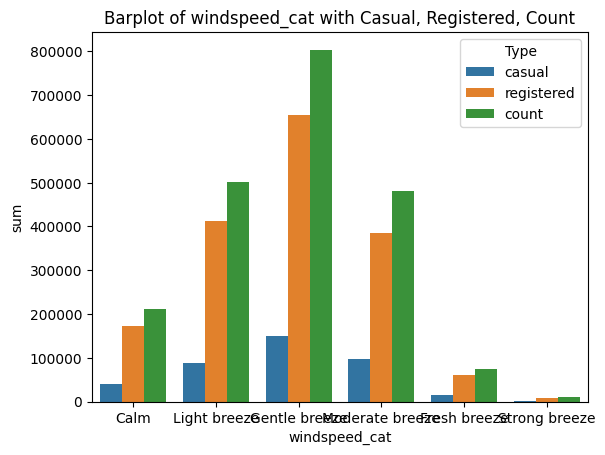

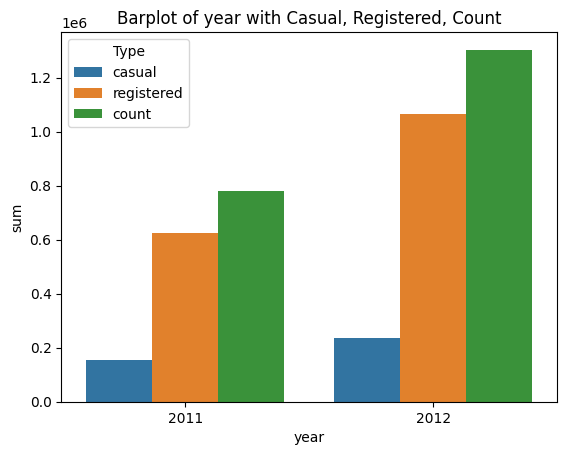

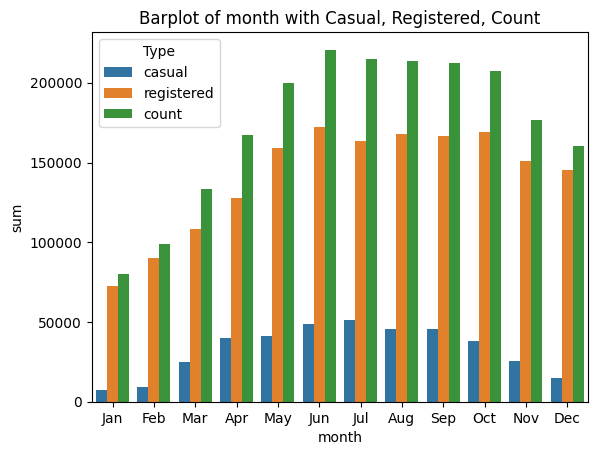

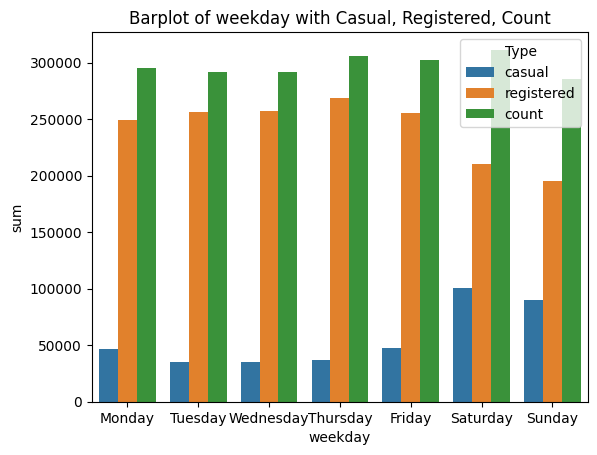

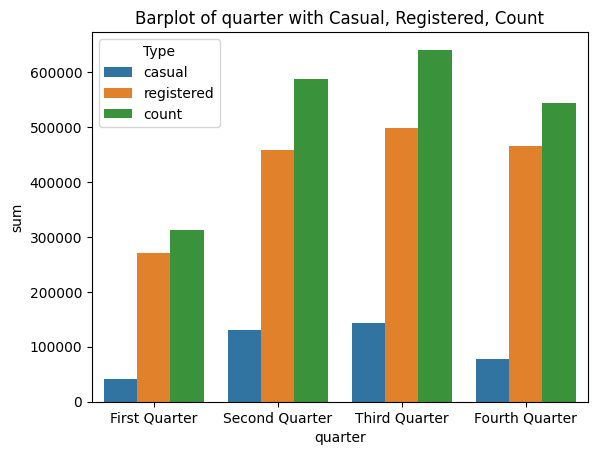

In [78]:
barplot_multivariate(list_of_cat_features,df)

In [79]:
#Infrence :
#Number of registered are always greater than casual regardless of season, holiday, workingday, weather.

In [80]:
#Defining a funtion for making boxplot for different columns with other columns
def boxplot_multivariate(list_of_cols,df):

  #Checking if column is present or not inside dataframe
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue

    #Transforming the dataframe so that i can get good visualization
    df_new=df[['casual','registered', 'count',col]].copy()
    df_new2 = df_new.set_index(col).stack().reset_index()
    df_new2.rename({0:'Values','level_1':'Type'},axis=1,inplace=True)

    #Plotting the transformed dataframe
    plt.figure(figsize=(df[col].nunique()*2,6))
    plt.title("Boxplot of "+col+" with Casual, Registered, Count",loc='center')
    sns.boxplot(x=df_new2[col].apply(lambda x: map_labels_to_cat[col][x]), y=df_new2['Values'], hue=df_new2['Type'])

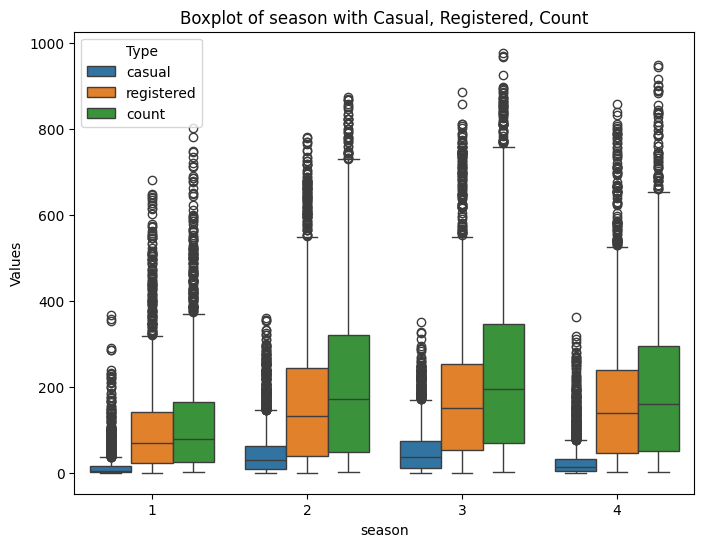

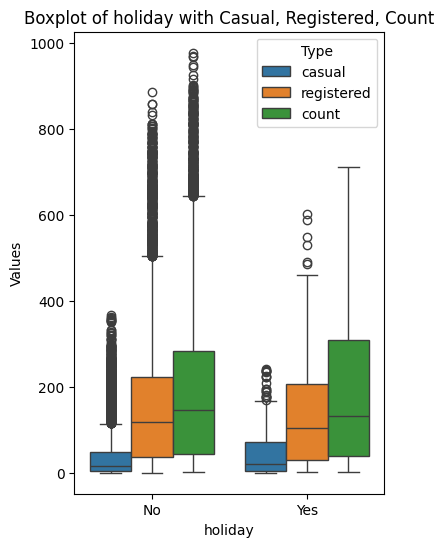

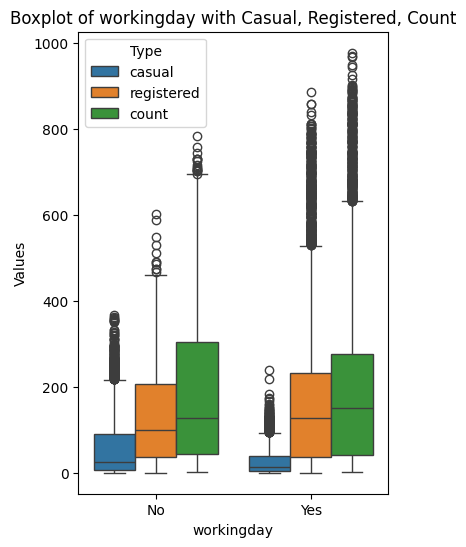

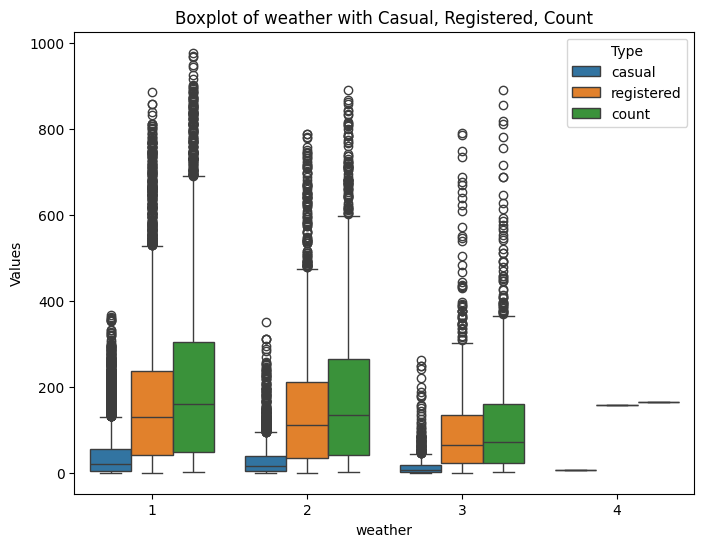

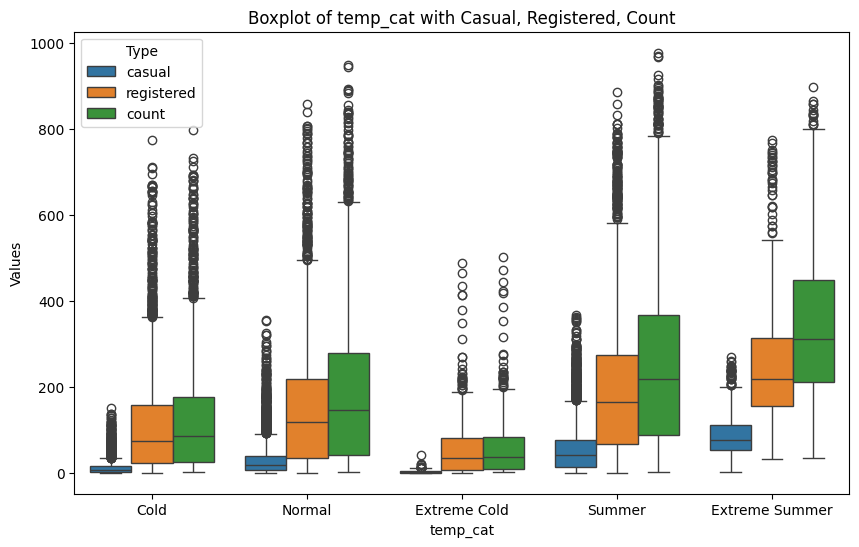

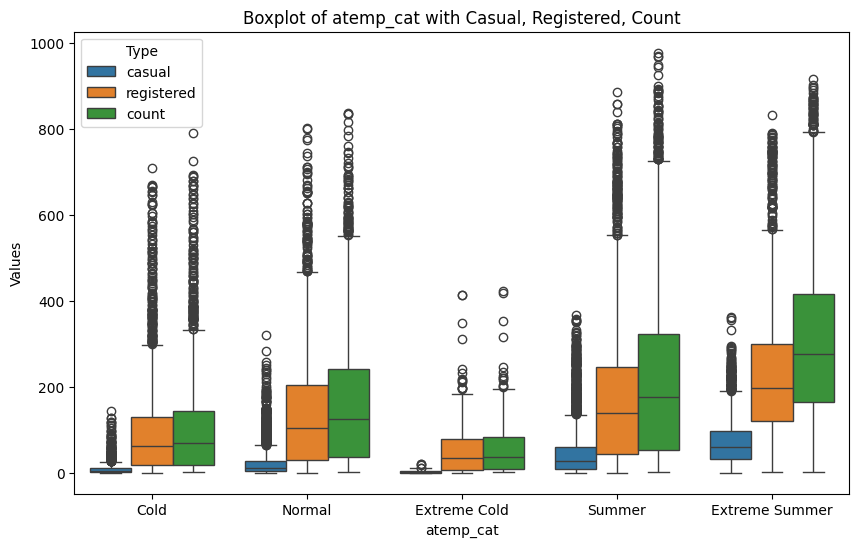

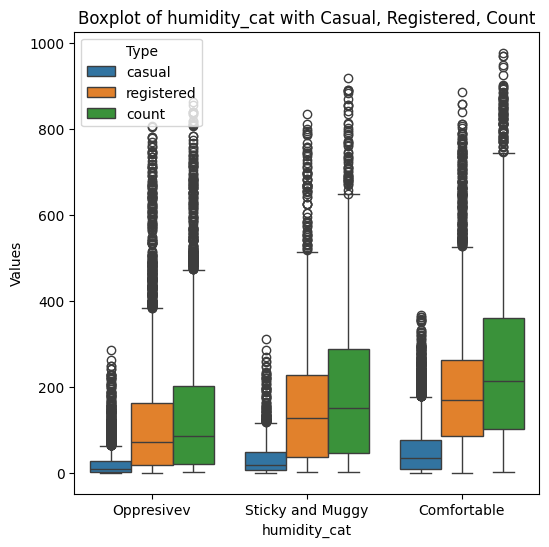

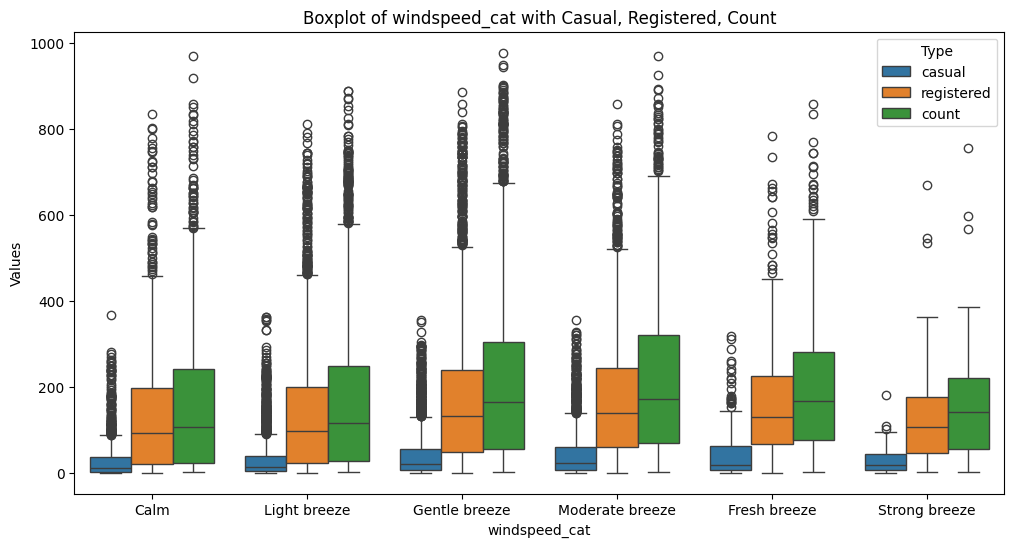

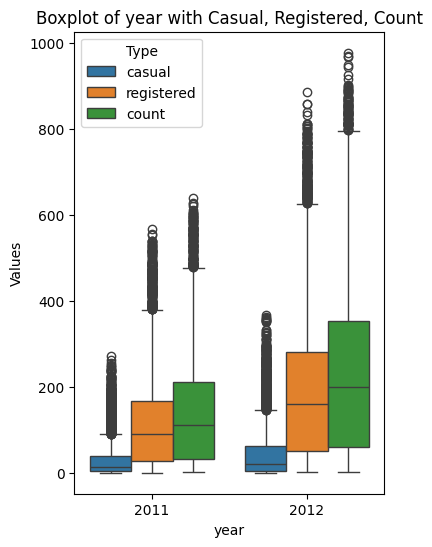

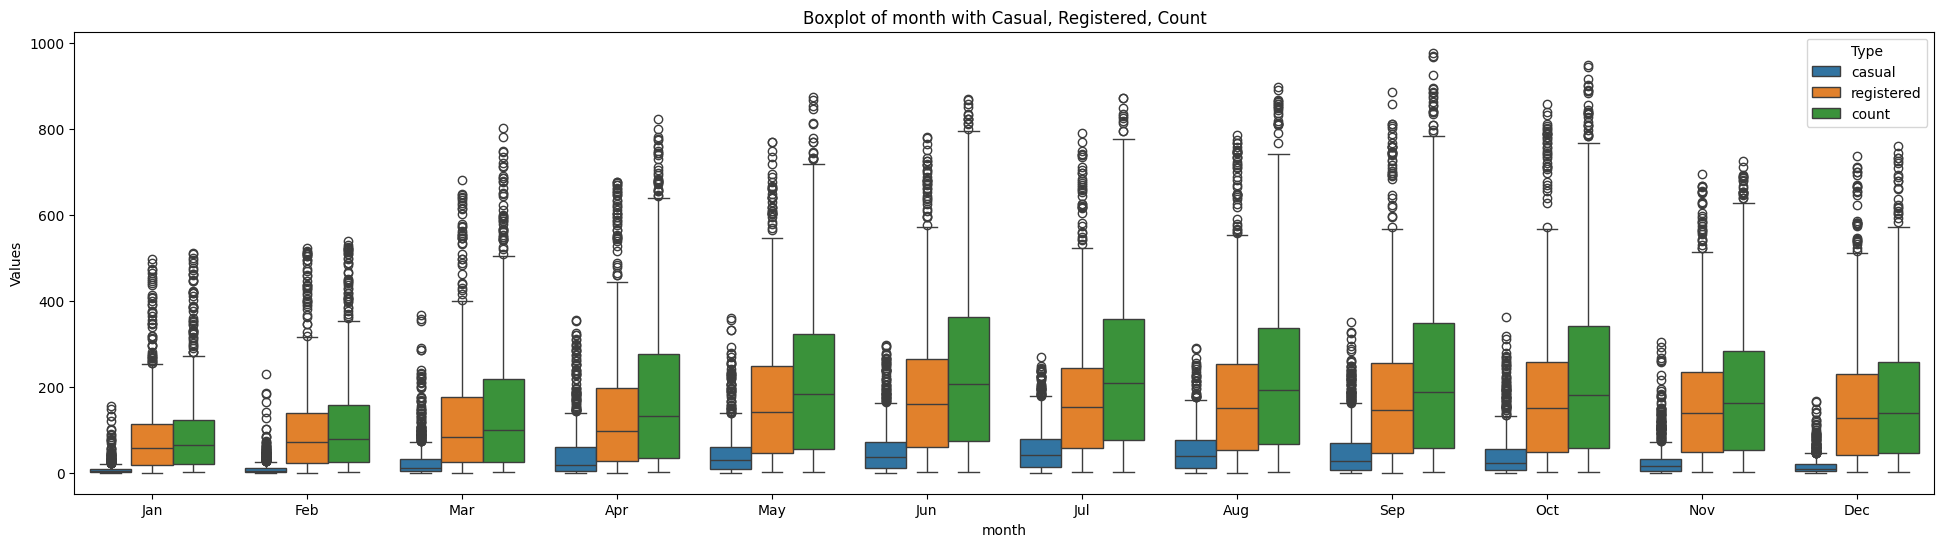

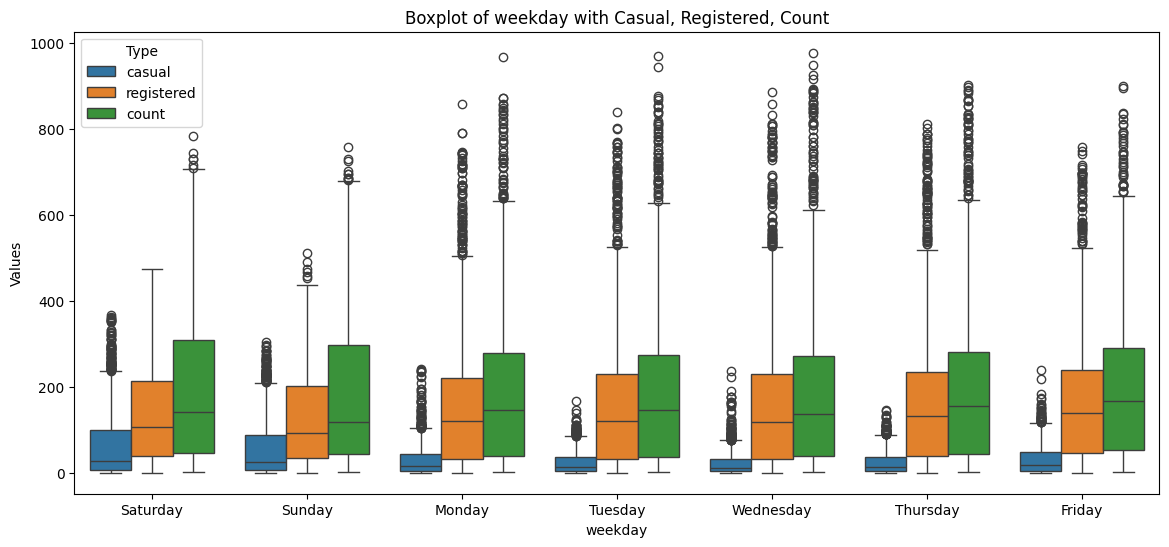

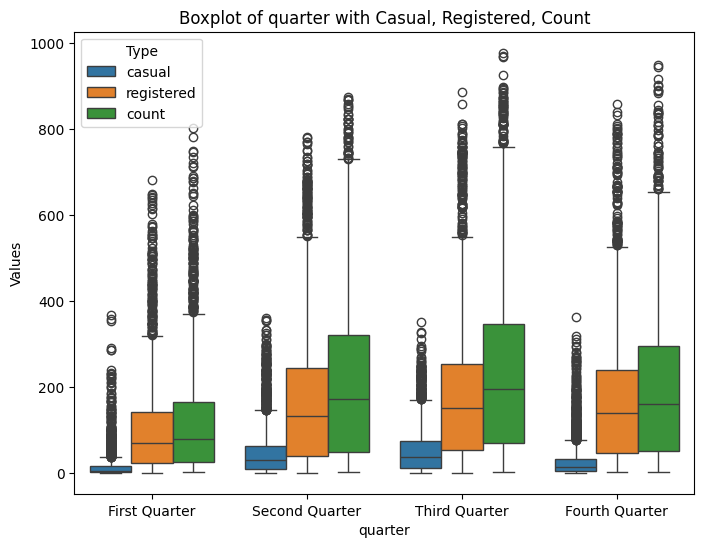

In [81]:
boxplot_multivariate(list_of_cat_features,df)

In [82]:
#Infrence :
#Number of registered is always greater than casual
# We can see where the demand is more and where the demand is less
# Further we can do hypothesis testing to test our hypothesis by this plot

#Bam!!!!!

## Task : Let's calculate condition probablity of casual, registered, count given other variables

In [83]:
#Defining a function for getting conditional probablities
def get_conditional_prob(list_of_cols,df):

  #Checking whether columns are present in DataFrame or not
  for col in list_of_cols:
    if col not in list(df.columns):
      print("Dataframe does not contain ----> ",col)
      continue


    #Transforming data for getting conditional probablities
    df2_new = df.drop(['datetime_modified','date'],axis=1).groupby(col).sum()[['casual','registered']].stack()
    df2_new = df2_new.reset_index()
    df2_new.rename(columns={'level_1':'Type', 0:'Sum'},inplace=True)

    #Calculating P(Type/Session)
    print('-'*50)
    print("P(Type/"+col+")")
    print('-'*50)
    print(pd.crosstab(index=df2_new[col].apply(lambda x: map_labels_to_cat[col][x]),columns=df2_new['Type'],aggfunc='sum',values=df2_new['Sum'],dropna=False,normalize='index').round(2))

In [84]:
get_conditional_prob(list_of_cat_features,df)

--------------------------------------------------
P(Type/season)
--------------------------------------------------
Type    casual  registered
season                    
1         0.13        0.87
2         0.22        0.78
3         0.22        0.78
4         0.14        0.86
--------------------------------------------------
P(Type/holiday)
--------------------------------------------------
Type     casual  registered
holiday                    
No         0.19        0.81
Yes        0.26        0.74
--------------------------------------------------
P(Type/workingday)
--------------------------------------------------
Type        casual  registered
workingday                    
No            0.31        0.69
Yes           0.13        0.87
--------------------------------------------------
P(Type/weather)
--------------------------------------------------
Type     casual  registered
weather                    
1          0.20        0.80
2          0.17        0.83
3          0.15 

In [85]:
print('='*200)

In [94]:
#Dataset -- Incomplete(Some date of in between are missing)
print("Min date : ",df.date.min())
print("Max date : ",df.date.max())
print("Total observations we have : ",df.shape[0])
#Data is collected on hourly bases - 2 years * 365 days * 24 hours - 13 days * 24 hours
print("Total observations we expect : ",2*365*24 - 13*24)

Min date :  2011-01-01
Max date :  2012-12-19
Total observations we have :  10886
Total observations we expect :  17208


# Hypothesis Testing

### With visual analysis we see that the count doesn't depend much on the working day

$H_0:$ The count on weekday is equal to the count on weekend.

$H_a:$ The count on weekday is greater than count on weekend.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

alpha = 0.05

In [95]:
weekday=df[df['workingday'] == 1]['count'].sample(3422)
weekend=df[df['workingday'] == 0]['count'].sample(3422)
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))

The sample standard deviation of the count on weekday is: 187.87
The sample standard deviation of the count on weekend is: 173.84


In [96]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative='greater')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the null hypothesis')

The p-value is 0.032546672773674235
As the p-value 0.032546672773674235 is less than the level of significance, we reject the null hypothesis


In [97]:
df.weather.value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [98]:
#Only 1 observation in weather 4
df=df[~(df['weather']==4)]

In [99]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2= df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)

In [104]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


$H_0:$ The mean count in different weather are equal.

$H_a:$ The mean count in different weather are different.

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.
- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test
We will test the null hypothesis

$H_0:$ Count follows normal distribution

against the alternative hypothesis

$H_a:$ Count doesn't follow normal distribution

In [105]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(df['count'].sample(4999))
print('The p-value is', p_value)

The p-value is 5.2680652345342e-53


<Axes: xlabel='count', ylabel='Density'>

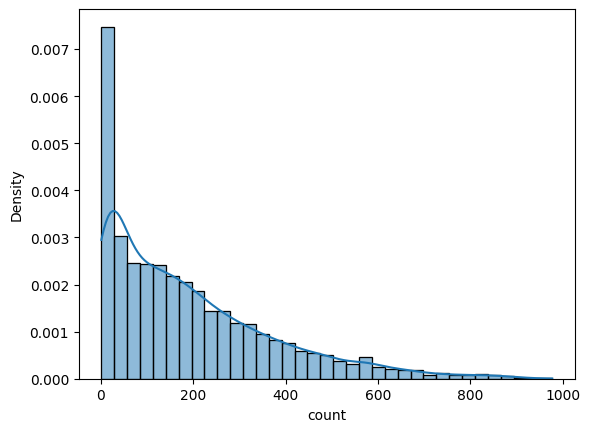

In [110]:
sns.histplot(df['count'].sample(4999),kde=True,stat = 'density')

<Axes: xlabel='count', ylabel='Density'>

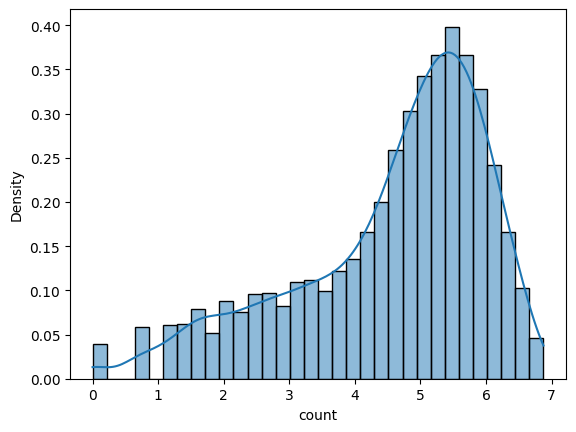

In [111]:
sns.histplot(np.log(df['count'].sample(4999)),kde=True,stat='density')

#### Levene’s test
We will test the null hypothesis

$H_0$: All the count variances are equal

against the alternative hypothesis

$H_a$: At least one variance is different from the rest

In [113]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( w1,
                             w2,
                             w3)
# find the p-value
print('The p-value is', p_value)

The p-value is 2.0450301289194015e-18


In [114]:
p_value>0.05

False

In [115]:
print(w1.var(), w2.var(), w3.var())

34760.91396660428 30531.729475507498 19352.591289406264


#Anova

In [116]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
# print the p-value
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the null hypothesis')

The p-value is 1.8980214697798488e-26
As the p-value 1.8980214697798488e-26 is less than the level of significance, we reject the null hypothesis


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.
Hence, we have enough statistical evidence to say that the mean count of rented bicycles are not
equal.